In [10]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
%store -r  final_merge
%store -r order_arriv

In [12]:
total_delivery = final_merge.copy()

In [13]:
total_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            5010 non-null   object        
 1   order_date          5010 non-null   datetime64[ns]
 2   state               5010 non-null   object        
 3   region              5010 non-null   object        
 4   ship_mode           5010 non-null   object        
 5   ready_to_ship_date  204 non-null    datetime64[ns]
 6   pickup_date         3003 non-null   datetime64[ns]
 7   arrival_scan_date   333 non-null    datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 313.2+ KB


In [14]:
#pd.to_datetime(total_delivery["total_deliv"], format="%d/%m/%Y")

KeyError: 'total_deliv'

In [ ]:
total_delivery.columns

Index(['order_id', 'order_date', 'state', 'region', 'ship_mode',
       'ready_to_ship_date', 'pickup_date', 'arrival_scan_date',
       'total_deliv'],
      dtype='object')

In [ ]:
total_delivery = total_delivery.filter(items=['pickup_date','arrival_scan_date'])
total_delivery.head(2)

,pickup_date,arrival_scan_date
0,NaT,NaT
1,NaT,NaT


In [ ]:
total_delivery.shape

(5010, 2)

In [ ]:
total_delivery.isnull().sum()

pickup_date          2007
arrival_scan_date    4677
dtype: int64

In [ ]:
total_delivery = total_delivery.dropna()

In [17]:
total_delivery['total_deliv'] = (total_delivery['arrival_scan_date'] - total_delivery['pickup_date'])
total_delivery.head()

,order_id,order_date,state,region,ship_mode,ready_to_ship_date,pickup_date,arrival_scan_date,total_deliv
0,CA-2017-100006,2017-09-07,New York,East,Standard Processing,NaT,NaT,NaT,NaT
1,CA-2017-100090,2017-07-08,California,West,Standard Processing,NaT,NaT,NaT,NaT
2,CA-2017-100293,2017-03-14,Florida,South,Standard Processing,NaT,NaT,NaT,NaT
3,CA-2017-100328,2017-01-28,New York,East,Standard Processing,NaT,NaT,NaT,NaT
4,CA-2017-100363,2017-04-08,Arizona,West,Standard Processing,NaT,NaT,NaT,NaT


In [ ]:
total_delivery.describe()

,pickup_date,arrival_scan_date,total_deliv
count,333,333,333
mean,2019-10-10 05:07:01.621621504,2019-10-14 19:36:12.972973056,4 days 14:29:11.351351351
min,2019-04-29 00:00:00,2019-05-03 00:00:00,1 days 00:00:00
25%,2019-09-04 00:00:00,2019-09-09 00:00:00,4 days 00:00:00
50%,2019-10-16 00:00:00,2019-10-21 00:00:00,5 days 00:00:00
75%,2019-12-11 00:00:00,2019-12-16 00:00:00,5 days 00:00:00
max,2020-05-13 00:00:00,2020-05-15 00:00:00,7 days 00:00:00
std,NaN,NaN,1 days 04:47:16.148329809


In [ ]:
total_delivery['total_deliv'].value_counts()

total_deliv
5 days    179
3 days     45
4 days     44
6 days     25
7 days     20
2 days     17
1 days      3
Name: count, dtype: int64

In [ ]:
total_delivery['total_deliv'].mode()

0   5 days
Name: total_deliv, dtype: timedelta64[ns]

total_delivery['total_deliv'].median()

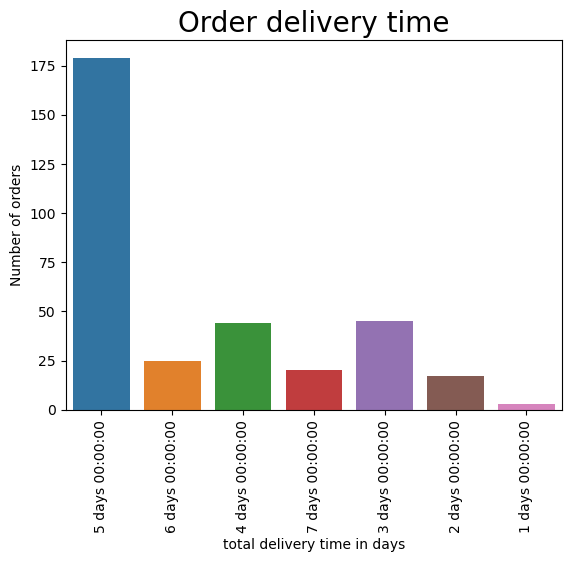

In [18]:
#day_order = ["1 day", "2 days", "3 days", "4 days", "5 days", "6 days","7 days"]
f1 = sns.countplot(x=total_delivery['total_deliv']) # create countplot
f1.tick_params(axis='x', rotation=90) # get x-ticks and rotate them
f1.set_xlabel("total delivery time in days", fontsize = 10)
#f1.set_xticklabels(labels=["1 day", "2 days", "3 days", "4 days", "5 days", "6 days", "7 days"])
f1.set_ylabel("Number of orders", fontsize = 10); # set label for y-axis
f1.set_title('Order delivery time', fontsize=20);

ValueError: boxplot method requires numerical columns, nothing to plot.

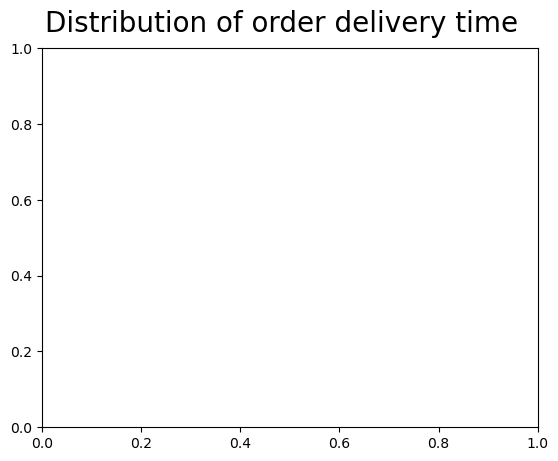

In [20]:
plt.suptitle('Distribution of order delivery time', fontsize=20)
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots
total_delivery.boxplot(column='order_delivery_time') # creates boxplot for order lead time
plt.ylabel('Days');